In [45]:
import requests
import pickle
import pandas as pd
import json as js
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from sklearn.cluster import KMeans

In [3]:
players_df = pd.read_csv('players_df_500.csv')
teams_df = pd.read_csv('teams_df_500.csv')
teams_df = teams_df.drop_duplicates()
teams_df = teams_df.sort_values('id')
games_df = pd.read_csv('games_df_500.csv')
#events_df = pd.read_csv('events_df.csv')
#players_df
#teams_df
#games_df
#events_df

In [3]:
events_df = pd.read_csv('events_df_500.csv')

In [1]:
#events_df

NameError: name 'events_df' is not defined

In [6]:
avg_age = pd.DataFrame()
avg_age = round(players_df.groupby('teamID')['currentAge'].mean(),1).sort_values()
teamsname = teams_df[['id','name']]
#avg_age = avg_age.to_frame()
#avg_age.dtypes
#avg_age.join(teams_df, on='teamID', how='left', lsuffix='teamID', rsuffix='id')
#teamsname
agebyteams = pd.merge(left=avg_age, right=teamsname, left_on='teamID', right_on='id', how='left')
agebyteams

,currentAge,id,name
0,28.2,3,New York Rangers
1,28.3,12,Carolina Hurricanes
2,28.3,7,Buffalo Sabres
3,28.3,29,Columbus Blue Jackets
4,28.4,52,Winnipeg Jets
5,28.7,1,New Jersey Devils
6,28.7,10,Toronto Maple Leafs
7,28.8,21,Colorado Avalanche
8,29.1,24,Anaheim Ducks
9,29.2,4,Philadelphia Flyers


Text(0.5, 0, 'Kor')

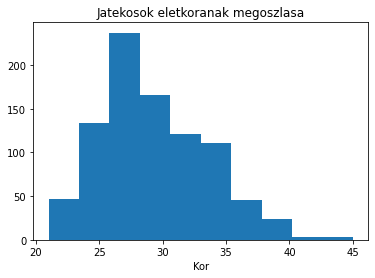

In [7]:
playersage = players_df[['id','currentAge']]
playersage = playersage.drop_duplicates()
playersage = playersage.drop(columns=['id'])
plt.hist(playersage)
plt.title('Jatekosok eletkoranak megoszlasa')
plt.xlabel('Kor')

<AxesSubplot:xlabel='coX', ylabel='coY'>

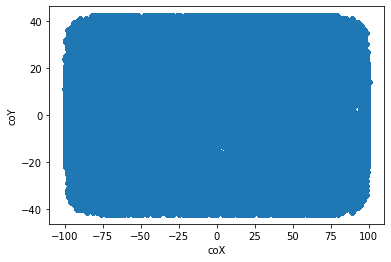

In [7]:
events_df.plot(x="coX", y="coY", kind="scatter",
        colormap="YlOrRd")

In [5]:
events_df.head()

,gameId,eventId,eventType,eventTypeDesc,period,periodTime,periodType,goalsHome,goalsAway,coX,coY,player1Id,player1Type,player2Id,player2Type,player3Id,player3Type,player4Id,player4Type
0,2019020001,0,Game Scheduled,Game Scheduled,1,00:00,REGULAR,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019020001,1,Period Ready,Period Ready,1,00:00,REGULAR,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019020001,2,Period Start,Period Start,1,00:00,REGULAR,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019020001,3,Faceoff,John Tavares faceoff won against Colin White,1,00:00,REGULAR,0,0,0.0,0.0,8475166.0,Winner,8478400.0,Loser,NaN,NaN,NaN,NaN
4,2019020001,4,Goal,"Brady Tkachuk (1) Tip-In, assists: Connor Brow...",1,00:25,REGULAR,0,1,85.0,-1.0,8480801.0,Scorer,8477015.0,Assist,8478400.0,Assist,8475883.0,Goalie


In [67]:
sog_df = pd.DataFrame()
sog_df = events_df[events_df['eventType'].isin(['Goal'])]
sog_df = sog_df[sog_df['player1Id'].isin([8471214])]
#sog_df

In [71]:
for idx, i in enumerate(sog_df['coX']):
    #print(i)
    if i<0:
        #print(i, sog_df['coY'].iloc[idx])
        sog_df['coX'].iloc[idx] = abs(sog_df['coX'].iloc[idx])
        sog_df['coY'].iloc[idx] = sog_df['coY'].iloc[idx]*-1
        #print(i, sog_df['coY'].iloc[idx])
#sog_df['coY'] = sog_df['coY'].abs()
sog_df

,gameId,eventId,eventType,eventTypeDesc,period,periodTime,periodType,goalsHome,goalsAway,coX,coY,player1Id,player1Type,player2Id,player2Type,player3Id,player3Type,player4Id,player4Type
448,2019020002,66,Goal,"Alex Ovechkin (1) Snap Shot, assists: John Car...",1,15:37,REGULAR,2,1,57.0,-18.0,8471214,Scorer,8474590,Assist,8474189.0,Assist,8476412.0,Goalie
16743,2019020052,124,Goal,"Alex Ovechkin (2) Slap Shot, assists: John Car...",2,04:46,REGULAR,1,2,53.0,22.0,8471214,Scorer,8474590,Assist,8475744.0,Assist,8471469.0,Goalie
16802,2019020052,183,Goal,"Alex Ovechkin (3) Slap Shot, assists: John Car...",2,17:36,REGULAR,2,4,60.0,20.0,8471214,Scorer,8474590,Assist,8473563.0,Assist,8471469.0,Goalie
22769,2019020070,326,Goal,"Alex Ovechkin (4) Backhand, assists: Tom Wilso...",3,19:03,REGULAR,1,4,4.0,-34.0,8471214,Scorer,8476880,Assist,0.0,0,0.0,0
26880,2019020083,312,Goal,"Alex Ovechkin (5) Slap Shot, assists: Evgeny K...",3,17:39,REGULAR,3,5,34.0,-7.0,8471214,Scorer,8475744,Assist,8474590.0,Assist,8475831.0,Goalie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79633968,2019020398,309,Goal,"Alex Ovechkin (17) Slap Shot, assists: Dmitry ...",3,11:36,REGULAR,3,3,55.0,28.0,8471214,Scorer,8475200,Assist,8476329.0,Assist,8476883.0,Goalie
79636520,2019020406,146,Goal,"Alex Ovechkin (18) Wrist Shot, assists: John C...",2,09:21,REGULAR,1,2,80.0,15.0,8471214,Scorer,8474590,Assist,8475744.0,Assist,8473541.0,Goalie
79636660,2019020406,286,Goal,"Alex Ovechkin (19) Snap Shot, assists: T.J. Os...",3,18:25,REGULAR,2,4,81.0,1.0,8471214,Scorer,8471698,Assist,8475462.0,Assist,0.0,0
79636667,2019020406,293,Goal,"Alex Ovechkin (20) Wrist Shot, assists: none",3,19:05,REGULAR,2,5,80.0,0.0,8471214,Scorer,0,0,0.0,0,0.0,0


In [61]:
for i in sog_df:
    print(i)
    #print(i['coX'], i['coY'])
    if i['coX']<0:
        i['coX'] = abs(i['coX'])
        i['coY'] = i['coY']*-1
        #print(i['coX'], i['coY'])

gameId


TypeError: string indices must be integers

In [42]:
events_df.head()

,gameId,eventId,eventType,eventTypeDesc,period,periodTime,periodType,goalsHome,goalsAway,coX,coY,player1Id,player1Type,player2Id,player2Type,player3Id,player3Type,player4Id,player4Type
0,2019020001,0,Game Scheduled,Game Scheduled,1,00:00,REGULAR,0,0,0.0,0.0,0,0,0,0,0.0,0,0.0,0
1,2019020001,1,Period Ready,Period Ready,1,00:00,REGULAR,0,0,0.0,0.0,0,0,0,0,0.0,0,0.0,0
2,2019020001,2,Period Start,Period Start,1,00:00,REGULAR,0,0,0.0,0.0,0,0,0,0,0.0,0,0.0,0
3,2019020001,3,Faceoff,John Tavares faceoff won against Colin White,1,00:00,REGULAR,0,0,0.0,0.0,8475166,Winner,8478400,Loser,0.0,0,0.0,0
4,2019020001,4,Goal,"Brady Tkachuk (1) Tip-In, assists: Connor Brow...",1,00:25,REGULAR,0,1,85.0,-1.0,8480801,Scorer,8477015,Assist,8478400.0,Assist,8475883.0,Goalie


In [4]:
events_df = events_df.fillna(0)
events_df = events_df.astype({'player1Id': 'int64','player2Id':'int64'})
events_df.dtypes

gameId             int64
eventId            int64
eventType         object
eventTypeDesc     object
period             int64
periodTime        object
periodType        object
goalsHome          int64
goalsAway          int64
coX              float64
coY              float64
player1Id          int64
player1Type       object
player2Id          int64
player2Type       object
player3Id        float64
player3Type       object
player4Id        float64
player4Type       object
dtype: object

In [76]:
sog_df.shape

(10500, 19)

(-42.5, 42.5)

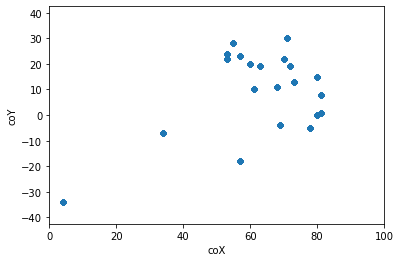

In [80]:
sog_df.plot(x="coX", y="coY", kind="scatter",colormap="YlOrRd")
plt.xlim(0,100)
plt.ylim(-42.5,42.5)

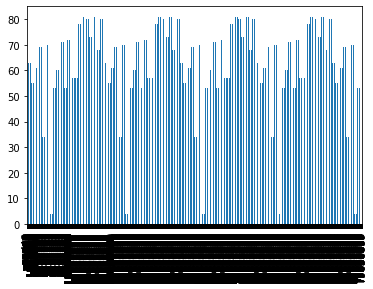

In [88]:
proba = pd.DataFrame()
proba = sog_df['coX']
#proba
ax = proba.plot.bar()

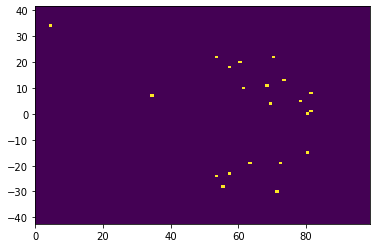

In [41]:
x = sog_df['coX']
y = sog_df['coY']

plt.hist2d(x,y, bins=[np.arange(0,100),np.arange(-42.5,42.5)])

plt.show()

In [19]:
sog_df

,gameId,eventId,eventType,eventTypeDesc,period,periodTime,periodType,goalsHome,goalsAway,coX,coY,player1Id,player1Type,player2Id,player2Type,player3Id,player3Type,player4Id,player4Type
448,2019020002,66,Goal,"Alex Ovechkin (1) Snap Shot, assists: John Car...",1,15:37,REGULAR,2,1,57.0,18.0,8471214,Scorer,8474590,Assist,8474189.0,Assist,8476412.0,Goalie
16743,2019020052,124,Goal,"Alex Ovechkin (2) Slap Shot, assists: John Car...",2,04:46,REGULAR,1,2,53.0,22.0,8471214,Scorer,8474590,Assist,8475744.0,Assist,8471469.0,Goalie
16802,2019020052,183,Goal,"Alex Ovechkin (3) Slap Shot, assists: John Car...",2,17:36,REGULAR,2,4,60.0,20.0,8471214,Scorer,8474590,Assist,8473563.0,Assist,8471469.0,Goalie
22769,2019020070,326,Goal,"Alex Ovechkin (4) Backhand, assists: Tom Wilso...",3,19:03,REGULAR,1,4,4.0,34.0,8471214,Scorer,8476880,Assist,0.0,0,0.0,0
26880,2019020083,312,Goal,"Alex Ovechkin (5) Slap Shot, assists: Evgeny K...",3,17:39,REGULAR,3,5,34.0,7.0,8471214,Scorer,8475744,Assist,8474590.0,Assist,8475831.0,Goalie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79633968,2019020398,309,Goal,"Alex Ovechkin (17) Slap Shot, assists: Dmitry ...",3,11:36,REGULAR,3,3,55.0,28.0,8471214,Scorer,8475200,Assist,8476329.0,Assist,8476883.0,Goalie
79636520,2019020406,146,Goal,"Alex Ovechkin (18) Wrist Shot, assists: John C...",2,09:21,REGULAR,1,2,80.0,15.0,8471214,Scorer,8474590,Assist,8475744.0,Assist,8473541.0,Goalie
79636660,2019020406,286,Goal,"Alex Ovechkin (19) Snap Shot, assists: T.J. Os...",3,18:25,REGULAR,2,4,81.0,1.0,8471214,Scorer,8471698,Assist,8475462.0,Assist,0.0,0
79636667,2019020406,293,Goal,"Alex Ovechkin (20) Wrist Shot, assists: none",3,19:05,REGULAR,2,5,80.0,0.0,8471214,Scorer,0,0,0.0,0,0.0,0


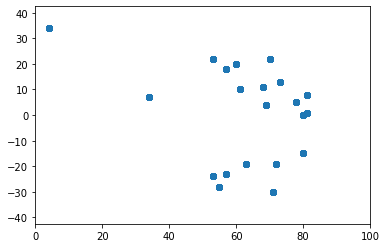

In [40]:
x = sog_df['coX']
y = sog_df['coY']
plt.xlim(0,100)
plt.ylim(-42.5,42.5)
plt.scatter(x, y)

In [15]:
xydf = pd.DataFrame()
xydf = sog_df[['coX','coY']]

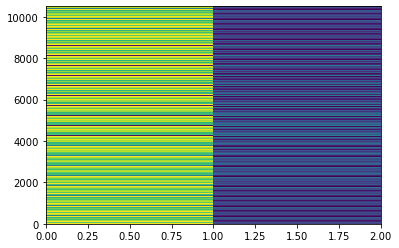

In [16]:
plt.pcolor(xydf)

<AxesSubplot:>

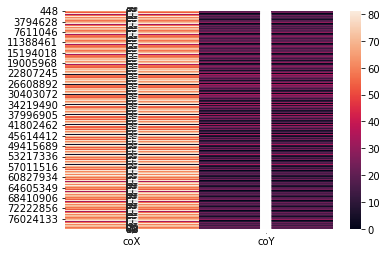

In [18]:
sb.heatmap(xydf, annot=True)

/var/folders/z6/nzpwwscs6qj7t6gldff9vtlw0000gn/T/ipykernel_6886/3625213899.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels = [''], fontsize = 18,
/var/folders/z6/nzpwwscs6qj7t6gldff9vtlw0000gn/T/ipykernel_6886/3625213899.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels = [''], fontsize = 18,


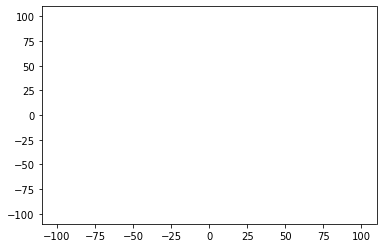

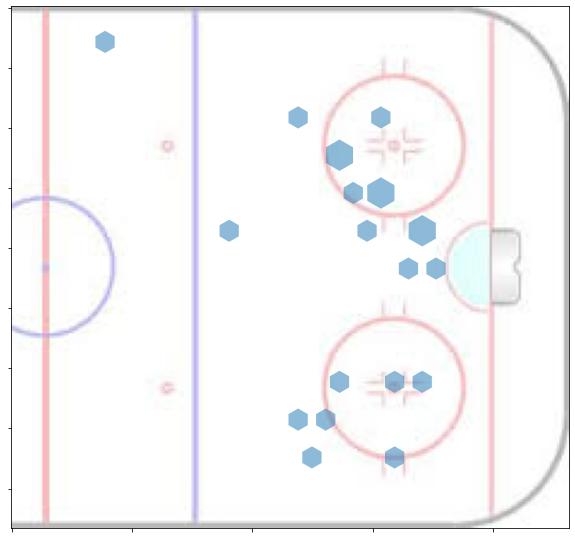

In [38]:
from PIL import Image
import math
from matplotlib.patches import RegularPolygon
xbnds = np.array([-100.,100.0])
ybnds = np.array([-100,100])
extent = [xbnds[0],xbnds[1],ybnds[0],ybnds[1]]

gridsize= 30;mincnt=0
# First we will used the hexbin function to simply bucket our shot data into basically a 2D histogram
league_hex_data = plt.hexbin(sog_df['coX'],
   sog_df['coY'],gridsize=gridsize,
   extent=extent,mincnt=mincnt,alpha=0.0)
# Now we extract the bin coordinates and counts
league_verts = league_hex_data.get_offsets();
league_shot_frequency = league_hex_data.get_array();
# Do the same thing for the goal data
league_goal_hex_data =  plt.hexbin(sog_df['coX'],
   sog_df['coY'],gridsize=gridsize,
   extent=extent,mincnt=mincnt,alpha=0.0)
# Since the grid is the same we can use a shared bin coordinate set from the above. So here we just get the counts
league_goal_frequency = league_goal_hex_data.get_array();

# Using matplotlib we create a new figure for plotting
fig=plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
# Clean up the figure to be completely blank
ax.set_facecolor("white")
fig.patch.set_facecolor("white")
fig.patch.set_alpha(0.0)
# Remove the labelling of axes
ax.set_xticklabels(labels = [''], fontsize = 18,
   alpha = .7,minor=False)
ax.set_yticklabels(labels = [''], fontsize = 18,
   alpha = .7,minor=False)
# Using pillow to get the rink image and extract the image size
I = Image.open('hockeyrink.jpeg')
ax.imshow(I);width, height = I.size

# Calculate the scaling factor and offset (trial and error)
scalingx=width/100-0.6;
scalingy=height/100+0.5;
x_trans=33;
y_trans=height/2
# We will want to scale the size of our hex bins with the image so we calculate a "radius" scaling factor here
S = 3.8*scalingx;

# Loop over the locations and draw the hex
for i,v in enumerate(league_verts):
   # Ignore empty locations
   if league_shot_frequency[i] < 1:continue
   # Normalize the shot frequency data between 0-1 
   scaled_league_shot_frequency = league_shot_frequency[i]/max(league_shot_frequency)
   # Scale the hexagon size based on shot frequency
   radius = S*math.sqrt(scaled_league_shot_frequency)
   # Finally we will plot the hexagon including the scaling and
   #translations we found earlier
   hex = RegularPolygon((x_trans+v[0]*scalingx, 
      y_trans-v[1]*scalingy),numVertices=6, radius=radius,
      orientation=np.radians(0),alpha=0.5, edgecolor=None)
   ax.add_patch(hex)

In [43]:
events_df.head()

,gameId,eventId,eventType,eventTypeDesc,period,periodTime,periodType,goalsHome,goalsAway,coX,coY,player1Id,player1Type,player2Id,player2Type,player3Id,player3Type,player4Id,player4Type
0,2019020001,0,Game Scheduled,Game Scheduled,1,00:00,REGULAR,0,0,0.0,0.0,0,0,0,0,0.0,0,0.0,0
1,2019020001,1,Period Ready,Period Ready,1,00:00,REGULAR,0,0,0.0,0.0,0,0,0,0,0.0,0,0.0,0
2,2019020001,2,Period Start,Period Start,1,00:00,REGULAR,0,0,0.0,0.0,0,0,0,0,0.0,0,0.0,0
3,2019020001,3,Faceoff,John Tavares faceoff won against Colin White,1,00:00,REGULAR,0,0,0.0,0.0,8475166,Winner,8478400,Loser,0.0,0,0.0,0
4,2019020001,4,Goal,"Brady Tkachuk (1) Tip-In, assists: Connor Brow...",1,00:25,REGULAR,0,1,85.0,-1.0,8480801,Scorer,8477015,Assist,8478400.0,Assist,8475883.0,Goalie


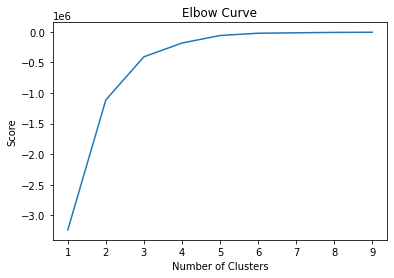

In [89]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = sog_df[['coX']]
X_axis = sog_df[['coY']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [ ]:
sog_df